# <b><span style='color:#F1A424'>AutoML - Binary Classification </span> </b>

## <b> Problem overview:</b>
    

**Dataset used : Wine Quality Dataset**

**Features**:

- `fixed acidity`: fixed acidity of wine.
- `volatile acidity`: volatile acidity of wine.
- `citric acid`: citric acid of wine.
- `residual sugar`: residual sugar of wine.
- `chlorides`: chlorides.
- `free sulfur dioxide`: free sulfur dioxide in wine.
- `total sulfur dioxide`: total sulfur dioxide in wine.
- `density`: density of wine.
- `pH`: pH of wine.
- `sulphates`: sulphates in wine.
- `alcohol`: alcohol in wine.

**Target Variable**:

- `quality`: Quality of wine

        
**Objective**:

The primary objective is typically to build a model that can accurately predict the quality of wine.

**Usecase**:

Here, we will use AutoML(Automated Machine Learning) functionality to automate the entire process of developing a predictive model. It will perform feature exploration, feature engineering, data preparation, model training and evaluation on dataset in auto run and at end we will get leaderboard containined different models along with their performance. Model will also have rank associated with them which indicates which is best performing model for given data followed by other models.

In [1]:
# Importing AutoML from teradataml
from teradataml import AutoML, AutoClassifier

In [2]:
# Importing other important libraries
import getpass
from teradataml import create_context, remove_context
from teradataml import DataFrame
from teradataml import load_example_data
from teradataml import TrainTestSplit

In [3]:
# Create the connection.
host = getpass.getpass("Host: ")
username = getpass.getpass("Username: ")
password = getpass.getpass("Password: ")

con = create_context(host=host, username=username, password=password)

Host:  ········
Username:  ········
Password:  ········


## <b><span style='color:#F1A424'>| 1.</span> Loading Dataset </b>

In [4]:
# Loading dataset from example data collection
load_example_data('teradataml','wine_data')

In [5]:
# Fetching in teradata dataframe
wine_df = DataFrame("wine_data")

In [6]:
# first 5 rows
wine_df.head()

fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
4.9,0.42,0.0,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.0,good
5.0,0.38,0.01,1.6,0.048,26.0,60.0,0.99084,3.7,0.75,14.0,good
5.0,0.4,0.5,4.3,0.046,29.0,80.0,0.9902,3.49,0.66,13.6,good
5.0,0.42,0.24,2.0,0.06,19.0,50.0,0.9917,3.72,0.74,14.0,good
5.0,0.74,0.0,1.2,0.041,16.0,46.0,0.99258,4.01,0.59,12.5,good
5.1,0.51,0.18,2.1,0.042,16.0,101.0,0.9924,3.46,0.87,12.9,good
5.0,1.02,0.04,1.4,0.045,41.0,85.0,0.9938,3.75,0.48,10.5,bad
5.0,1.04,0.24,1.6,0.05,32.0,96.0,0.9934,3.74,0.62,11.5,bad
4.7,0.6,0.17,2.3,0.058,17.0,106.0,0.9932,3.85,0.6,12.9,good
4.6,0.52,0.15,2.1,0.054,8.0,65.0,0.9934,3.9,0.56,13.1,bad


In [7]:
# wine_df dataset
wine_df.shape

(1599, 12)

In [8]:
# Performing sampling to get 80% for trainning and 20% for testing
wine_df_sample = wine_df.sample(frac = [0.8, 0.2])

In [9]:
wine_df_sample.head()

fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,sampleid
4.9,0.42,0.0,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.0,good,1
5.0,0.4,0.5,4.3,0.046,29.0,80.0,0.9902,3.49,0.66,13.6,good,2
5.0,1.02,0.04,1.4,0.045,41.0,85.0,0.9938,3.75,0.48,10.5,bad,1
5.0,0.74,0.0,1.2,0.041,16.0,46.0,0.99258,4.01,0.59,12.5,good,1
5.0,0.38,0.01,1.6,0.048,26.0,60.0,0.99084,3.7,0.75,14.0,good,1
5.1,0.42,0.0,1.8,0.044,18.0,88.0,0.99157,3.68,0.73,13.6,good,1
5.0,1.04,0.24,1.6,0.05,32.0,96.0,0.9934,3.74,0.62,11.5,bad,1
5.0,0.42,0.24,2.0,0.06,19.0,50.0,0.9917,3.72,0.74,14.0,good,1
4.7,0.6,0.17,2.3,0.058,17.0,106.0,0.9932,3.85,0.6,12.9,good,2
4.6,0.52,0.15,2.1,0.054,8.0,65.0,0.9934,3.9,0.56,13.1,bad,2


In [10]:
# Fetching train and test data
wine_df_train= wine_df_sample[wine_df_sample['sampleid'] == 1].drop('sampleid', axis=1)
wine_df_test = wine_df_sample[wine_df_sample['sampleid'] == 2].drop('sampleid', axis=1)

In [11]:
# train data shape
wine_df_train.shape

(1279, 12)

In [12]:
# test data shape
wine_df_test.shape

(320, 12)

In [13]:
#train dataset
wine_df_train.head()

fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
5.0,0.38,0.01,1.6,0.048,26.0,60.0,0.99084,3.7,0.75,14.0,good
5.0,0.74,0.0,1.2,0.041,16.0,46.0,0.99258,4.01,0.59,12.5,good
5.0,1.04,0.24,1.6,0.05,32.0,96.0,0.9934,3.74,0.62,11.5,bad
5.1,0.47,0.02,1.3,0.034,18.0,44.0,0.9921,3.9,0.62,12.8,good
5.1,0.585,0.0,1.7,0.044,14.0,86.0,0.99264,3.56,0.94,12.9,good
5.1,0.51,0.18,2.1,0.042,16.0,101.0,0.9924,3.46,0.87,12.9,good
5.1,0.42,0.0,1.8,0.044,18.0,88.0,0.99157,3.68,0.73,13.6,good
5.0,0.42,0.24,2.0,0.06,19.0,50.0,0.9917,3.72,0.74,14.0,good
5.0,1.02,0.04,1.4,0.045,41.0,85.0,0.9938,3.75,0.48,10.5,bad
4.9,0.42,0.0,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.0,good


In [14]:
# test dataset
wine_df_test.head()

fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
5.0,0.4,0.5,4.3,0.046,29.0,80.0,0.9902,3.49,0.66,13.6,good
5.2,0.48,0.04,1.6,0.054,19.0,106.0,0.9927,3.54,0.62,12.2,good
5.4,0.42,0.27,2.0,0.092,23.0,55.0,0.99471,3.78,0.64,12.3,good
5.6,0.66,0.0,2.2,0.087,3.0,11.0,0.99378,3.71,0.63,12.8,good
5.6,0.615,0.0,1.6,0.089,16.0,59.0,0.9943,3.58,0.52,9.9,bad
5.8,1.01,0.66,2.0,0.039,15.0,88.0,0.99357,3.66,0.6,11.5,good
5.6,0.85,0.05,1.4,0.045,12.0,88.0,0.9924,3.56,0.82,12.9,good
5.2,0.34,0.0,1.8,0.05,27.0,63.0,0.9916,3.68,0.79,14.0,good
4.7,0.6,0.17,2.3,0.058,17.0,106.0,0.9932,3.85,0.6,12.9,good
4.6,0.52,0.15,2.1,0.054,8.0,65.0,0.9934,3.9,0.56,13.1,bad


## <b><span style='color:#F1A424'>| 2.</span> Fitting AutoML </b>

In [15]:
# Creating AutoML instance
# Excluding 'svm' from model training.
# Keeping early stopping metrics threshold to 0.6 for 'MICRO-RECALL', early stopping timer threshold to 300 sec
# and verbose level 2 for detailed loggging

aml = AutoML(task_type="Classification",
             exclude='svm',
             stopping_metric='MICRO-RECALL', 
             stopping_tolerance=0.60,
             max_runtime_secs=300,
             verbose=2)

Feature Exploration started ...

Data Overview:
Total Rows in the data: 1279
Total Columns in the data: 12

Column Summary:


ColumnName,Datatype,NonNullCount,NullCount,BlankCount,ZeroCount,PositiveCount,NegativeCount,NullPercentage,NonNullPercentage
pH,FLOAT,1279,0,None,0,1279,0,0.0,100.0
density,FLOAT,1279,0,None,0,1279,0,0.0,100.0
citric_acid,FLOAT,1279,0,None,108,1171,0,0.0,100.0
fixed_acidity,FLOAT,1279,0,None,0,1279,0,0.0,100.0
residual_sugar,FLOAT,1279,0,None,0,1279,0,0.0,100.0
free_sulfur_dioxide,FLOAT,1279,0,None,0,1279,0,0.0,100.0
alcohol,FLOAT,1279,0,None,0,1279,0,0.0,100.0
volatile_acidity,FLOAT,1279,0,None,0,1279,0,0.0,100.0
chlorides,FLOAT,1279,0,None,0,1279,0,0.0,100.0
sulphates,FLOAT,1279,0,None,0,1279,0,0.0,100.0



Statistics of Data:


func,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
min,4.9,0.12,0,0.9,0.012,1,6,0.99,2.74,0.33,8.4
std,1.749,0.178,0.196,1.414,0.049,10.543,33.42,0.002,0.154,0.169,1.066
25%,7.1,0.398,0.09,1.9,0.07,7,22,0.996,3.21,0.55,9.5
50%,7.9,0.52,0.25,2.2,0.079,14,38,0.997,3.31,0.62,10.1
75%,9.2,0.64,0.42,2.6,0.091,22,63,0.998,3.4,0.73,11.1
max,15.9,1.33,1,15.5,0.611,72,289,1.004,4.01,2,14.9
mean,8.311,0.531,0.268,2.56,0.088,15.941,47.041,0.997,3.31,0.657,10.409
count,1279,1279,1279,1279,1279,1279,1279,1279,1279,1279,1279



Categorical Columns with their Distinct values:
ColumnName                DistinctValueCount
quality                   2         

No Futile columns found.

Target Column Distribution:


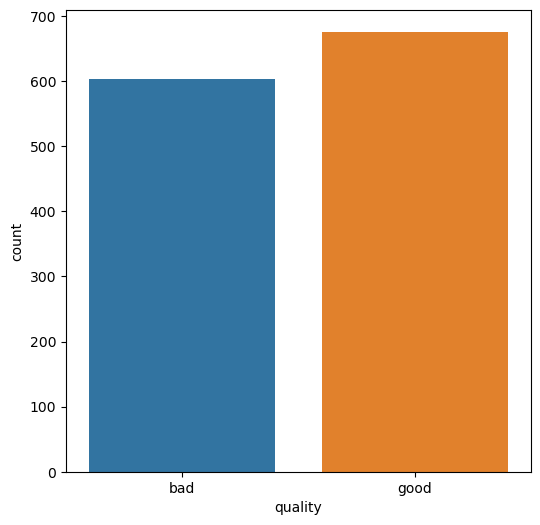

Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
            ColumnName  OutlierPercentage
0              alcohol           0.860047
1            sulphates           3.909304
2            chlorides           6.411259
3              density           2.971071
4          citric_acid           0.078186
5  free_sulfur_dioxide           1.720094
6                   pH           2.032838
7     volatile_acidity           1.094605
8       residual_sugar          10.242377
9        fixed_acidity           3.127443


fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
12.3,0.5,0.49,2.2,0.089,5.0,14.0,1.0002,3.19,0.44,9.6,bad
10.5,0.24,0.47,2.1,0.066,6.0,24.0,0.9978,3.15,0.9,11.0,good
10.5,0.28,0.51,1.7,0.08,10.0,24.0,0.9982,3.2,0.89,9.4,good
7.4,0.36,0.34,1.8,0.075,18.0,38.0,0.9933,3.38,0.88,13.6,good
8.4,0.25,0.39,2.0,0.041,4.0,10.0,0.99386,3.27,0.71,12.5,good
8.4,0.56,0.08,2.1,0.105,16.0,44.0,0.9958,3.13,0.52,11.0,bad
8.2,0.885,0.2,1.4,0.086,7.0,31.0,0.9946,3.11,0.46,10.0,bad
8.2,0.35,0.33,2.4,0.076,11.0,47.0,0.99599,3.27,0.81,11.0,good
9.0,0.66,0.17,3.0,0.077,5.0,13.0,0.9976,3.29,0.55,10.4,bad
9.0,0.46,0.31,2.8,0.093,19.0,98.0,0.99815,3.32,0.63,9.5,good


Remaining Rows in the data: 1125                                                        
Remaining Columns in the data: 12


result data stored in table '"AUTOML_USER"."ml__td_sqlmr_persist_out__1711971962548502"'


Dataset does not contain any feature related to dates.                                   


No Missing Values Detected.                                                              


No imputation is Required.                                                               


Encoding not required.                                                                   


Training size : 0.8                                                                      
Testing size  : 0.2                                                                      


id,chlorides,total_sulfur_dioxide,alcohol,residual_sugar,citric_acid,sulphates,volatile_acidity,fixed_acidity,density,pH,free_sulfur_dioxide,quality
8,0.089,14.0,9.6,2.2,0.49,0.44,0.5,12.3,1.0002,3.19,5.0,0
22,0.093,98.0,9.5,2.8,0.31,0.63,0.46,9.0,0.99815,3.32,19.0,1
27,0.165,12.0,9.2,1.9,0.12,0.86,0.53,7.4,0.99702,3.26,4.0,0
10,0.066,24.0,11.0,2.1,0.47,0.9,0.24,10.5,0.9978,3.15,6.0,1
14,0.077,13.0,10.4,3.0,0.17,0.55,0.66,9.0,0.9976,3.29,5.0,0
19,0.066,47.0,10.4,1.8,0.24,0.62,0.41,7.4,0.9956,3.37,18.0,0
28,0.072,36.0,12.4,2.1,0.42,0.78,0.34,8.4,0.99392,3.11,23.0,1
31,0.104,22.0,10.6,3.0,0.6,0.68,0.28,8.2,0.99828,3.39,10.0,0
12,0.041,10.0,12.5,2.0,0.39,0.71,0.25,8.4,0.99386,3.27,4.0,1
29,0.403,56.0,9.3,1.8,0.68,1.15,0.635,8.6,0.99632,3.02,19.0,0


id,chlorides,total_sulfur_dioxide,alcohol,residual_sugar,citric_acid,sulphates,volatile_acidity,fixed_acidity,density,pH,free_sulfur_dioxide,quality
38,0.08,86.0,9.5,2.5,0.34,0.62,0.43,9.0,0.9987,3.38,26.0,1
16,0.079,46.0,10.2,3.1,0.49,0.8,0.27,12.3,0.9993,3.2,28.0,1
108,0.109,119.0,9.1,2.6,0.29,0.5,0.59,8.4,0.99801,3.15,31.0,0
35,0.078,61.0,10.8,2.4,0.13,0.59,0.52,7.4,0.99528,3.43,34.0,1
20,0.105,44.0,11.0,2.1,0.08,0.52,0.56,8.4,0.9958,3.13,16.0,0
126,0.069,73.0,10.0,2.0,0.29,0.57,0.6,9.0,0.99654,3.34,32.0,0
36,0.072,46.0,11.8,1.8,0.12,0.89,0.62,8.4,0.99504,3.38,38.0,1
121,0.071,102.0,10.5,6.1,0.36,0.8,0.5,7.5,0.9978,3.35,17.0,0
21,0.11,133.0,9.8,2.0,0.29,1.98,0.49,8.6,0.9972,2.93,19.0,0
122,0.075,39.0,12.7,3.2,0.19,0.52,0.36,6.3,0.9956,3.56,15.0,1


Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
             ColumnName  OutlierPercentage
0             chlorides           6.844444
1           citric_acid           0.088889
2         fixed_acidity           3.111111
3        residual_sugar           9.777778
4             sulphates           4.355556
5                    pH           2.044444
6               alcohol           0.977778
7      volatile_acidity           0.800000
8  total_sulfur_dioxide           3.466667
9   free_sulfur_dioxide           1.955556


['chlorides', 'density', 'sulphates', 'alcohol', 'pH', 'total_sulfur_dioxide', 'free_sulfur_dioxide', 'volatile_acidity', 'citric_acid', 'fixed_acidity']
result data stored in table '"AUTOML_USER"."ml__td_sqlmr_persist_out__1711970286408667"'8


['residual_sugar']
result data stored in table '"AUTOML_USER"."ml__td_sqlmr_persist_out__1711973643293495"'8


result data stored in table '"AUTOML_USER"."ml__td_sqlmr_persist_out__1711971131586871"'8
result data stored in table '"AUTOML_USER"."ml__td_sqlmr_persist_out__1711971602158260"'


['chlorides', 'total_sulfur_dioxide', 'alcohol', 'residual_sugar', 'citric_acid', 'sulphates', 'volatile_acidity', 'fixed_acidity', 'density', 'pH', 'free_sulfur_dioxide']


['chlorides', 'total_sulfur_dioxide', 'alcohol', 'residual_sugar', 'citric_acid', 'sulphates', 'volatile_acidity', 'fixed_acidity', 'density', 'pH', 'free_sulfur_dioxide']


id,quality,chlorides,total_sulfur_dioxide,alcohol,residual_sugar,citric_acid,sulphates,volatile_acidity,fixed_acidity,density,pH,free_sulfur_dioxide
999,0,0.6265060240963856,0.08695652173913043,0.21276595744680846,0.32653061224489793,0.5256410256410255,0.578125,0.16949152542372886,0.6000000000000002,0.6511627906976847,0.45945945945945915,0.07692307692307693
1100,1,0.13253012048192775,0.06086956521739131,0.31914893617021267,0.2448979591836735,0.5897435897435898,0.7187500000000001,0.18079096045197746,0.7142857142857143,0.5813953488372138,0.13513513513513523,0.05128205128205128
326,1,0.48192771084337355,0.3130434782608696,0.1914893617021277,0.2857142857142857,0.1923076923076923,0.32812500000000006,0.6101694915254239,0.4571428571428573,0.5581395348837278,0.5,0.358974358974359
734,0,0.6024096385542169,0.6608695652173913,0.2978723404255319,0.48979591836734687,0.08974358974358974,0.32812500000000006,0.6271186440677967,0.22857142857142865,0.39534883720931313,0.5540540540540541,0.358974358974359
183,1,0.44578313253012053,0.391304347826087,0.3617021276595746,0.5306122448979592,0.5512820512820512,0.7500000000000002,0.09039548022598873,0.4428571428571428,0.5000000000000129,0.7972972972972969,0.717948717948718
1468,1,0.39759036144578314,0.12173913043478261,0.7446808510638296,0.4081632653061225,0.6153846153846153,0.7187500000000001,0.3276836158192091,0.6142857142857144,0.5697674418604708,0.5405405405405402,0.1794871794871795
570,1,0.5783132530120482,0.4782608695652174,0.4255319148936169,0.4081632653061225,0.07692307692307691,0.5312500000000001,0.4802259887005651,0.4000000000000001,0.47674418604652696,0.5675675675675673,0.6153846153846154
1203,1,0.8554216867469882,0.1565217391304348,0.7021276595744681,0.979591836734694,0.5128205128205129,0.578125,0.2598870056497175,0.5428571428571429,0.3604651162790842,0.39189189189189183,0.23076923076923078
265,1,0.25301204819277107,0.12173913043478261,0.6595744680851066,0.4081632653061225,0.5128205128205129,0.48437500000000006,0.45197740112994356,0.3428571428571429,0.2674418604651274,0.43243243243243207,0.23076923076923078
1060,1,0.5542168674698796,0.09565217391304348,0.40425531914893614,0.48979591836734687,0.4358974358974359,0.5000000000000001,0.2824858757062147,0.7142857142857143,0.5116279069767559,0.3108108108108107,0.05128205128205128


id,quality,chlorides,total_sulfur_dioxide,alcohol,residual_sugar,citric_acid,sulphates,volatile_acidity,fixed_acidity,density,pH,free_sulfur_dioxide
1039,1,0.43373493975903615,0.3826086956521739,0.8085106382978723,0.48979591836734687,0.25641025641025644,0.5312500000000001,0.519774011299435,0.12857142857142861,0.2674418604651274,0.8648648648648648,0.3076923076923077
242,1,0.22891566265060248,0.2782608695652174,0.5106382978723404,0.2857142857142857,0.34615384615384615,0.8125000000000001,0.3954802259887006,0.48571428571428577,0.32558139534884234,0.2972972972972975,0.38461538461538464
305,1,0.24096385542168675,0.21739130434782608,0.31914893617021267,0.2857142857142857,0.10256410256410256,0.48437500000000006,0.519774011299435,0.04285714285714296,0.2790697674418704,0.7567567567567566,0.4358974358974359
1876,1,0.48192771084337355,0.5478260869565217,0.3617021276595746,0.5714285714285714,0.6282051282051282,0.6562500000000001,0.2598870056497175,1.042857142857143,0.8139534883720994,0.2432432432432434,0.6153846153846154
366,1,0.45783132530120485,0.2956521739130435,0.27659574468085113,0.2857142857142857,0.358974358974359,0.4375,0.4745762711864408,0.4571428571428573,0.6279069767441987,0.6081081081081082,0.20512820512820512
1140,1,0.15662650602409636,0.09565217391304348,0.46808510638297884,0.16326530612244902,0.0,0.46875000000000006,0.8813559322033899,0.20000000000000004,0.2674418604651274,0.7567567567567566,0.15384615384615385
835,1,0.36144578313253023,0.02608695652173913,0.23404255319148962,0.12244897959183675,0.2692307692307692,0.32812500000000006,0.5084745762711864,0.3714285714285715,0.2558139534883844,0.2972972972972975,0.02564102564102564
122,1,0.43373493975903615,0.28695652173913044,0.8510638297872338,0.8163265306122448,0.24358974358974358,0.29687500000000006,0.2711864406779661,0.17142857142857146,0.37209302325582716,0.8378378378378377,0.3076923076923077
530,1,0.5662650602409638,0.11304347826086956,0.574468085106383,0.32653061224489793,0.5384615384615384,0.421875,0.248587570621469,0.4000000000000001,0.3604651162790842,0.5540540540540541,0.1282051282051282
469,0,2.36144578313253,0.9478260869565217,0.17021276595744692,2.2448979591836733,0.4230769230769231,0.3593750000000001,0.5762711864406781,0.25714285714285723,0.6395348837209417,0.3783783783783786,1.6153846153846154


['total_sulfur_dioxide', 'alcohol', 'sulphates', 'volatile_acidity']


['r_total_sulfur_dioxide', 'r_alcohol', 'r_sulphates', 'r_volatile_acidity']


id,quality,r_total_sulfur_dioxide,r_alcohol,r_sulphates,r_volatile_acidity
999,0,0.08695652173913043,0.21276595744680846,0.578125,0.16949152542372886
1100,1,0.06086956521739131,0.31914893617021267,0.7187500000000001,0.18079096045197746
326,1,0.3130434782608696,0.1914893617021277,0.32812500000000006,0.6101694915254239
734,0,0.6608695652173913,0.2978723404255319,0.32812500000000006,0.6271186440677967
183,1,0.391304347826087,0.3617021276595746,0.7500000000000002,0.09039548022598873
1468,1,0.12173913043478261,0.7446808510638296,0.7187500000000001,0.3276836158192091
570,1,0.4782608695652174,0.4255319148936169,0.5312500000000001,0.4802259887005651
1203,1,0.1565217391304348,0.7021276595744681,0.578125,0.2598870056497175
265,1,0.12173913043478261,0.6595744680851066,0.48437500000000006,0.45197740112994356
1060,1,0.09565217391304348,0.40425531914893614,0.5000000000000001,0.2824858757062147


id,quality,r_total_sulfur_dioxide,r_alcohol,r_sulphates,r_volatile_acidity
1039,1,0.3826086956521739,0.8085106382978723,0.5312500000000001,0.519774011299435
242,1,0.2782608695652174,0.5106382978723404,0.8125000000000001,0.3954802259887006
305,1,0.21739130434782608,0.31914893617021267,0.48437500000000006,0.519774011299435
1876,1,0.5478260869565217,0.3617021276595746,0.6562500000000001,0.2598870056497175
366,1,0.2956521739130435,0.27659574468085113,0.4375,0.4745762711864408
1140,1,0.09565217391304348,0.46808510638297884,0.46875000000000006,0.8813559322033899
835,1,0.02608695652173913,0.23404255319148962,0.32812500000000006,0.5084745762711864
122,1,0.28695652173913044,0.8510638297872338,0.29687500000000006,0.2711864406779661
530,1,0.11304347826086956,0.574468085106383,0.421875,0.248587570621469
469,0,0.9478260869565217,0.17021276595744692,0.3593750000000001,0.5762711864406781


['chlorides', 'total_sulfur_dioxide', 'alcohol', 'residual_sugar', 'citric_acid', 'sulphates', 'volatile_acidity', 'fixed_acidity', 'density', 'pH', 'free_sulfur_dioxide']


id,quality,chlorides,total_sulfur_dioxide,alcohol,residual_sugar,citric_acid,sulphates,volatile_acidity,fixed_acidity,density,pH,free_sulfur_dioxide
999,0,0.6265060240963856,0.08695652173913043,0.21276595744680846,0.32653061224489793,0.5256410256410255,0.578125,0.16949152542372886,0.6000000000000002,0.6511627906976847,0.45945945945945915,0.07692307692307693
326,1,0.48192771084337355,0.3130434782608696,0.1914893617021277,0.2857142857142857,0.1923076923076923,0.32812500000000006,0.6101694915254239,0.4571428571428573,0.5581395348837278,0.5,0.358974358974359
1018,0,0.31325301204819284,0.23478260869565218,0.21276595744680846,0.08163265306122447,0.0,0.3437500000000001,0.8135593220338984,0.5142857142857142,0.3488372093023283,0.4459459459459459,0.5384615384615384
1100,1,0.13253012048192775,0.06086956521739131,0.31914893617021267,0.2448979591836735,0.5897435897435898,0.7187500000000001,0.18079096045197746,0.7142857142857143,0.5813953488372138,0.13513513513513523,0.05128205128205128
1060,1,0.5542168674698796,0.09565217391304348,0.40425531914893614,0.48979591836734687,0.4358974358974359,0.5000000000000001,0.2824858757062147,0.7142857142857143,0.5151162790697762,0.3108108108108107,0.05128205128205128
183,1,0.44578313253012053,0.391304347826087,0.3617021276595746,0.5306122448979592,0.5512820512820512,0.7500000000000002,0.09039548022598873,0.4428571428571428,0.5023255813953641,0.7972972972972969,0.717948717948718
570,1,0.5783132530120482,0.4782608695652174,0.4255319148936169,0.4081632653061225,0.07692307692307691,0.5312500000000001,0.4802259887005651,0.4000000000000001,0.47674418604652696,0.5675675675675673,0.6153846153846154
427,0,0.31325301204819284,0.10434782608695652,0.14893617021276614,0.16326530612244902,0.0,0.7968750000000001,0.519774011299435,0.15714285714285722,0.48837209302326995,0.8378378378378377,0.1282051282051282
734,0,0.6024096385542169,0.6608695652173913,0.2978723404255319,0.48979591836734687,0.08974358974358974,0.32812500000000006,0.6271186440677967,0.22857142857142865,0.39534883720931313,0.5540540540540541,0.358974358974359
61,1,0.530120481927711,0.19130434782608696,0.27659574468085113,0.32653061224489793,0.3205128205128205,0.421875,0.5932203389830509,0.5,0.6686046511627991,0.45945945945945915,0.1282051282051282


id,quality,chlorides,total_sulfur_dioxide,alcohol,residual_sugar,citric_acid,sulphates,volatile_acidity,fixed_acidity,density,pH,free_sulfur_dioxide
13,0,0.19277108433734944,0.19130434782608696,0.5319148936170212,0.4489795918367346,0.34615384615384615,0.7343750000000001,0.3954802259887006,0.5,0.32093023255815284,0.3243243243243245,0.28205128205128205
49,1,0.530120481927711,0.7391304347826086,0.23404255319148962,0.32653061224489793,0.34615384615384615,0.390625,0.5762711864406781,0.3428571428571429,0.43720930232559563,0.43243243243243207,0.358974358974359
171,0,0.7349397590361447,0.14782608695652175,0.1914893617021277,0.2448979591836735,0.08974358974358974,0.390625,0.5875706214689267,0.3285714285714287,0.4302325581395421,0.4864864864864862,0.1282051282051282
21,0,0.8554216867469882,1.1043478260869566,0.23404255319148962,0.32653061224489793,0.37179487179487175,2.5781250000000004,0.4180790960451978,0.5,0.5581395348837278,-0.013513513513513221,0.41025641025641024
16,1,0.48192771084337355,0.34782608695652173,0.31914893617021267,0.7755102040816326,0.6282051282051282,0.7343750000000001,0.16949152542372886,1.0285714285714287,0.8023255813953564,0.35135135135135154,0.6410256410256411
108,0,0.8433734939759038,0.9826086956521739,0.08510638297872346,0.5714285714285714,0.37179487179487175,0.265625,0.5310734463276836,0.47142857142857153,0.6523255813953538,0.28378378378378366,0.717948717948718
36,1,0.39759036144578314,0.34782608695652173,0.6595744680851066,0.2448979591836735,0.15384615384615383,0.8750000000000002,0.5649717514124294,0.47142857142857153,0.3069767441860587,0.5945945945945944,0.8974358974358975
121,0,0.38554216867469876,0.8347826086956521,0.3829787234042554,1.9999999999999996,0.4615384615384615,0.7343750000000001,0.42937853107344637,0.3428571428571429,0.6279069767441987,0.5540540540540541,0.358974358974359
35,1,0.4698795180722892,0.4782608695652174,0.4468085106382981,0.48979591836734687,0.16666666666666666,0.40625,0.45197740112994356,0.3285714285714287,0.33488372093024704,0.6621621621621623,0.7948717948717948
120,0,5.120481927710845,0.5304347826086957,0.14893617021276614,0.2857142857142857,0.8974358974358974,1.4843750000000002,0.35028248587570626,0.38571428571428573,0.5813953488372138,0.25675675675675663,0.48717948717948717


['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7', 'col_8']


response_column : quality                                                                                                                             
name : glm
family : BINOMIAL
lambda1 : (0.001, 0.02, 0.1)
alpha : (0.15, 0.85)
learning_rate : OPTIMAL
initial_eta : (0.05, 0.1)
momentum : (0.65, 0.8, 0.95)
iter_num_no_change : (5, 10, 50)
iter_max : (300, 200, 400)
batch_size : (10, 50, 60, 80)
Total number of models for glm : 1296
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

response_column : quality
name : decision_forest
tree_type : Classification
min_impurity : (0.0, 0.1, 0.2)
max_depth : (5, 6, 8, 10)
min_node_size : (1, 2, 3)
num_trees : (-1, 20, 30)
Total number of models for decision_forest : 108
--------------------------------------------------------------------------------------------------------------------------------

GLM_0                                                                                                                                                                                                   
GLM_1                                                                                     
GLM_2                                                                                     


DECISIONFOREST_0                                                                                                                                                                                        
DECISIONFOREST_1                                                                          
DECISIONFOREST_2                                                                          


KNN_9                                                                                                                                                                                                   
KNN_4                                                                                     
KNN_8                                                                                     


XGBOOST_0                                                                                                                                                                                               
XGBOOST_1                                                                                 
XGBOOST_2                                                                                 


,Rank,Name,Feature selection,Accuracy,Micro-Precision,Micro-Recall,Micro-F1,Macro-Precision,Macro-Recall,Macro-F1,Weighted-Precision,Weighted-Recall,Weighted-F1
0,1,xgboost,rfe,0.755556,0.755556,0.755556,0.755556,0.757123,0.757571,0.755536,0.759386,0.755556,0.755662
1,2,xgboost,lasso,0.751111,0.751111,0.751111,0.751111,0.754167,0.753885,0.751106,0.756815,0.751111,0.751042
2,3,decision_forest,rfe,0.751111,0.751111,0.751111,0.751111,0.750598,0.749247,0.749682,0.750916,0.751111,0.750775
3,4,knn,rfe,0.751111,0.751111,0.751111,0.751111,0.751000,0.748732,0.749324,0.751058,0.751111,0.750547
4,5,decision_forest,pca,0.742222,0.742222,0.742222,0.742222,0.775230,0.751665,0.738456,0.781634,0.742222,0.736643
5,6,knn,pca,0.733333,0.733333,0.733333,0.733333,0.733000,0.730894,0.731418,0.733173,0.733333,0.732729
6,7,glm,pca,0.728889,0.728889,0.728889,0.728889,0.729960,0.725147,0.725769,0.729562,0.728889,0.727459
7,8,knn,lasso,0.724444,0.724444,0.724444,0.724444,0.723538,0.723006,0.723214,0.724231,0.724444,0.724280
8,9,decision_forest,lasso,0.724444,0.724444,0.724444,0.724444,0.723697,0.722491,0.722862,0.724160,0.724444,0.724072
9,10,xgboost,pca,0.720000,0.720000,0.720000,0.720000,0.727503,0.724473,0.719646,0.730866,0.720000,0.719070


In [16]:
# Fitting train data
aml.fit(wine_df_train, wine_df_train.quality)

## <b><span style='color:#F1A424'>| 3.</span> Leaderboard : </b>

In [17]:
# Fetching Leaderboard
aml.leaderboard()

,Rank,Name,Feature selection,Accuracy,Micro-Precision,Micro-Recall,Micro-F1,Macro-Precision,Macro-Recall,Macro-F1,Weighted-Precision,Weighted-Recall,Weighted-F1
0,1,xgboost,rfe,0.755556,0.755556,0.755556,0.755556,0.757123,0.757571,0.755536,0.759386,0.755556,0.755662
1,2,xgboost,lasso,0.751111,0.751111,0.751111,0.751111,0.754167,0.753885,0.751106,0.756815,0.751111,0.751042
2,3,decision_forest,rfe,0.751111,0.751111,0.751111,0.751111,0.750598,0.749247,0.749682,0.750916,0.751111,0.750775
3,4,knn,rfe,0.751111,0.751111,0.751111,0.751111,0.751000,0.748732,0.749324,0.751058,0.751111,0.750547
4,5,decision_forest,pca,0.742222,0.742222,0.742222,0.742222,0.775230,0.751665,0.738456,0.781634,0.742222,0.736643
5,6,knn,pca,0.733333,0.733333,0.733333,0.733333,0.733000,0.730894,0.731418,0.733173,0.733333,0.732729
6,7,glm,pca,0.728889,0.728889,0.728889,0.728889,0.729960,0.725147,0.725769,0.729562,0.728889,0.727459
7,8,knn,lasso,0.724444,0.724444,0.724444,0.724444,0.723538,0.723006,0.723214,0.724231,0.724444,0.724280
8,9,decision_forest,lasso,0.724444,0.724444,0.724444,0.724444,0.723697,0.722491,0.722862,0.724160,0.724444,0.724072
9,10,xgboost,pca,0.720000,0.720000,0.720000,0.720000,0.727503,0.724473,0.719646,0.730866,0.720000,0.719070


## <b><span style='color:#F1A424'>| 4.</span> Best Performing Model : </b>

In [18]:
# Fetching best performing model for dataset
aml.leader()

,Rank,Name,Feature selection,Accuracy,Micro-Precision,Micro-Recall,Micro-F1,Macro-Precision,Macro-Recall,Macro-F1,Weighted-Precision,Weighted-Recall,Weighted-F1
0,1,xgboost,rfe,0.755556,0.755556,0.755556,0.755556,0.757123,0.757571,0.755536,0.759386,0.755556,0.755662


## <b><span style='color:#F1A424'>| 5.</span> Generating Prediction : </b>

### <b><span style='color:#F1A424'>| 5.1.</span> Generating prediction on default validation test data </b>

In [19]:
# Generating prediction and metrics on default test data
prediction = aml.predict()

xgboost rfe
Target Column Mapping:
good: 1
bad: 0

 Prediction : 
     id  Prediction  Confidence_Lower  Confidence_upper  quality
0  1039           1             1.000             1.000        1
1   242           1             0.875             0.875        1
2   305           1             0.875             0.875        1
3  1876           1             0.875             0.875        1
4   366           0             0.625             0.625        1
5  1140           0             0.625             0.625        1
6   835           0             0.875             0.875        1
7   122           1             0.750             0.750        1
8   530           1             1.000             1.000        1
9   469           0             1.000             1.000        0

 Performance Metrics : 
       Prediction  Mapping  CLASS_1  CLASS_2  Precision    Recall        F1  Support
SeqNum                                                                              
0               0  CLASS

AUC,GINI
0.6825749167591566,0.3651498335183132


threshold_value,tpr,fpr
0.04081632653061224,0.7226890756302521,0.20754716981132076
0.08163265306122448,0.7226890756302521,0.20754716981132076
0.1020408163265306,0.7226890756302521,0.20754716981132076
0.12244897959183673,0.7226890756302521,0.20754716981132076
0.16326530612244897,0.7226890756302521,0.20754716981132076
0.18367346938775508,0.7226890756302521,0.20754716981132076
0.14285714285714285,0.7226890756302521,0.20754716981132076
0.061224489795918366,0.7226890756302521,0.20754716981132076
0.02040816326530612,0.7226890756302521,0.20754716981132076
0.0,1.0,1.0



 Confusion Matrix : 


array([[84, 22],
       [33, 86]], dtype=int64)

In [20]:
# Printing prediction
prediction.head()

id,Prediction,Confidence_Lower,Confidence_upper,quality
20,0,0.5,0.5,0
35,1,0.75,0.75,1
36,1,0.75,0.75,1
38,0,1.0,1.0,1
108,0,0.875,0.875,0
118,0,0.875,0.875,0
49,0,0.875,0.875,1
21,0,0.75,0.75,0
16,1,0.75,0.75,1
13,1,1.0,1.0,0


### <b><span style='color:#F1A424'>| 5.2. </span> Generating prediction on external test data </b>

In [21]:
# Generating prediction and metrics on test data
prediction = aml.predict(wine_df_test,3)

Data Transformation started ...
Performing transformation carried out in feature engineering phase ...
result data stored in table '"AUTOML_USER"."ml__td_sqlmr_persist_out__1711974986318331"'

Updated dataset after performing target column transformation :


id,chlorides,total_sulfur_dioxide,alcohol,residual_sugar,citric_acid,sulphates,volatile_acidity,fixed_acidity,density,pH,free_sulfur_dioxide,quality
101,0.073,42.0,10.5,1.4,0.59,0.68,0.5,12.0,0.998,2.92,23.0,1
61,0.07,49.0,9.6,4.5,0.49,0.57,0.46,12.5,0.9981,3.05,26.0,0
244,0.076,37.0,10.7,2.8,0.14,0.49,0.46,7.1,0.99624,3.36,15.0,0
122,0.08,141.0,9.9,2.1,0.21,0.51,0.69,7.9,0.9962,3.25,33.0,0
40,0.079,35.0,10.9,1.9,0.06,0.69,0.7,7.8,0.99628,3.4,20.0,0
120,0.082,28.0,9.4,2.0,0.12,0.5,0.56,7.8,0.997,3.37,7.0,1
80,0.114,29.0,9.1,1.6,0.29,1.56,0.61,7.8,0.9974,3.26,9.0,0
242,0.075,19.0,11.4,2.8,0.49,0.57,0.6,12.7,0.9994,3.14,5.0,0
162,0.341,56.0,9.2,1.8,0.51,1.08,0.32,7.9,0.9969,3.04,17.0,1
223,0.088,39.0,9.2,1.6,0.35,0.55,0.42,7.0,0.9961,3.34,16.0,0


Performing transformation carried out in data preparation phase ...
result data stored in table '"AUTOML_USER"."ml__td_sqlmr_persist_out__1711972265532703"'

Updated dataset after performing Lasso feature selection:


id,chlorides,total_sulfur_dioxide,alcohol,residual_sugar,citric_acid,sulphates,volatile_acidity,fixed_acidity,density,pH,free_sulfur_dioxide,quality
202,0.089,32.0,10.0,2.0,0.05,0.61,0.59,8.0,0.9973,3.36,12.0,0
78,0.092,28.0,10.0,2.6,0.12,0.72,0.705,8.3,0.9994,3.51,12.0,0
139,0.104,155.0,11.2,2.5,0.25,0.67,0.88,9.8,1.001,3.41,35.0,0
322,0.1,27.0,11.2,2.0,0.39,0.69,0.27,8.8,0.9955,3.15,20.0,1
97,0.087,49.0,11.0,2.6,0.59,0.65,0.59,11.5,0.9988,3.18,13.0,1
15,0.079,86.0,9.5,2.0,0.24,0.64,0.51,8.2,0.9976,3.34,16.0,1
179,0.088,18.0,10.5,1.8,0.01,0.56,0.58,7.7,0.9957,3.32,12.0,1
282,0.086,81.0,11.6,3.0,0.31,0.74,0.69,8.7,1.0002,3.48,23.0,1
223,0.088,39.0,9.2,1.6,0.35,0.55,0.42,7.0,0.9961,3.34,16.0,0
162,0.341,56.0,9.2,1.8,0.51,1.08,0.32,7.9,0.9969,3.04,17.0,1



Updated dataset after performing scaling on Lasso selected features :


id,quality,chlorides,total_sulfur_dioxide,alcohol,residual_sugar,citric_acid,sulphates,volatile_acidity,fixed_acidity,density,pH,free_sulfur_dioxide
122,0,0.4939759036144579,1.173913043478261,0.25531914893617036,0.3673469387755102,0.2692307692307692,0.28125000000000006,0.6440677966101696,0.4000000000000001,0.4418604651162851,0.41891891891891886,0.7692307692307693
99,1,0.6144578313253012,0.5826086956521739,0.17021276595744692,0.6530612244897959,0.5384615384615384,0.578125,0.5310734463276836,0.742857142857143,0.7674418604651274,0.45945945945945915,0.8205128205128205
444,1,0.5060240963855422,0.4,0.574468085106383,0.48979591836734687,0.5384615384615384,0.59375,0.4745762711864408,0.6428571428571429,0.5348837209302418,0.35135135135135154,0.5641025641025641
61,0,0.3734939759036146,0.3739130434782609,0.1914893617021277,1.3469387755102038,0.6282051282051282,0.37499999999999994,0.38418079096045205,1.0571428571428572,0.6627906976744277,0.14864864864864843,0.5897435897435898
40,0,0.48192771084337355,0.25217391304347825,0.46808510638297884,0.2857142857142857,0.07692307692307691,0.5625,0.6553672316384181,0.38571428571428573,0.45348837209302806,0.6216216216216214,0.4358974358974359
120,1,0.5180722891566266,0.19130434782608696,0.14893617021276614,0.32653061224489793,0.15384615384615383,0.265625,0.497175141242938,0.38571428571428573,0.5348837209302418,0.5810810810810811,0.10256410256410256
80,0,0.9036144578313255,0.2,0.08510638297872346,0.16326530612244902,0.37179487179487175,1.9218750000000002,0.5536723163841808,0.38571428571428573,0.5813953488372138,0.43243243243243207,0.15384615384615385
242,0,0.43373493975903615,0.11304347826086956,0.574468085106383,0.6530612244897959,0.6282051282051282,0.37499999999999994,0.5423728813559322,1.0857142857142856,0.8139534883720994,0.27027027027027045,0.05128205128205128
101,1,0.40963855421686746,0.3130434782608696,0.3829787234042554,0.08163265306122447,0.7564102564102564,0.5468750000000001,0.42937853107344637,0.9857142857142858,0.6511627906976847,-0.027027027027027042,0.5128205128205128
284,1,0.6867469879518073,0.40869565217391307,0.4893617021276596,0.5306122448979592,0.37179487179487175,0.5000000000000001,0.2598870056497175,0.2857142857142857,0.4418604651162851,0.6486486486486485,0.4358974358974359



Updated dataset after performing RFE feature selection:


id,total_sulfur_dioxide,alcohol,sulphates,volatile_acidity,quality
141,46.0,10.6,0.57,0.56,0
343,24.0,13.4,0.66,0.44,1
36,108.0,9.8,0.66,0.62,0
116,31.0,9.7,0.8,0.65,0
154,143.0,9.5,0.55,0.5,0
295,42.0,11.0,0.66,0.31,1
238,37.0,9.6,0.67,0.55,0
181,31.0,11.4,0.43,1.09,0
244,37.0,10.7,0.49,0.46,0
61,49.0,9.6,0.57,0.46,0



Updated dataset after performing scaling on RFE selected features :


id,quality,r_total_sulfur_dioxide,r_alcohol,r_sulphates,r_volatile_acidity
80,0,0.2,0.08510638297872346,1.9218750000000002,0.5536723163841808
61,0,0.3739130434782609,0.1914893617021277,0.37499999999999994,0.38418079096045205
244,0,0.26956521739130435,0.4255319148936169,0.25,0.38418079096045205
122,0,1.173913043478261,0.25531914893617036,0.28125000000000006,0.6440677966101696
99,1,0.5826086956521739,0.17021276595744692,0.578125,0.5310734463276836
444,1,0.4,0.574468085106383,0.59375,0.4745762711864408
183,1,0.11304347826086956,0.6170212765957446,0.46875000000000006,0.36158192090395486
364,1,0.33043478260869563,0.34042553191489383,0.78125,0.46327683615819215
40,0,0.25217391304347825,0.46808510638297884,0.5625,0.6553672316384181
120,1,0.19130434782608696,0.14893617021276614,0.265625,0.497175141242938



Updated dataset after performing scaling for PCA feature selection :


id,quality,chlorides,total_sulfur_dioxide,alcohol,residual_sugar,citric_acid,sulphates,volatile_acidity,fixed_acidity,density,pH,free_sulfur_dioxide
40,0,0.48192771084337355,0.25217391304347825,0.46808510638297884,0.2857142857142857,0.07692307692307691,0.5625,0.6553672316384181,0.38571428571428573,0.45348837209302806,0.6216216216216214,0.4358974358974359
122,0,0.4939759036144579,1.173913043478261,0.25531914893617036,0.3673469387755102,0.2692307692307692,0.28125000000000006,0.6440677966101696,0.4000000000000001,0.4418604651162851,0.41891891891891886,0.7692307692307693
387,1,0.0,0.7130434782608696,0.5957446808510638,0.32653061224489793,0.8461538461538461,0.421875,1.0056497175141244,0.10000000000000002,0.13953488372094164,0.9729729729729729,0.3076923076923077
101,1,0.40963855421686746,0.3130434782608696,0.3829787234042554,0.08163265306122447,0.7564102564102564,0.5468750000000001,0.42937853107344637,0.9857142857142858,0.6511627906976847,-0.027027027027027042,0.5128205128205128
61,0,0.3734939759036146,0.3739130434782609,0.1914893617021277,1.3469387755102038,0.6282051282051282,0.37499999999999994,0.38418079096045205,1.0571428571428572,0.6627906976744277,0.14864864864864843,0.5897435897435898
244,0,0.44578313253012053,0.26956521739130435,0.4255319148936169,0.6530612244897959,0.1794871794871795,0.25,0.38418079096045205,0.2857142857142857,0.4418604651162851,0.5675675675675673,0.3076923076923077
80,0,0.9036144578313255,0.2,0.08510638297872346,0.16326530612244902,0.37179487179487175,1.9218750000000002,0.5536723163841808,0.38571428571428573,0.5813953488372138,0.43243243243243207,0.15384615384615385
242,0,0.43373493975903615,0.11304347826086956,0.574468085106383,0.6530612244897959,0.6282051282051282,0.37499999999999994,0.5423728813559322,1.0857142857142856,0.8139534883720994,0.27027027027027045,0.05128205128205128
99,1,0.6144578313253012,0.5826086956521739,0.17021276595744692,0.6530612244897959,0.5384615384615384,0.578125,0.5310734463276836,0.742857142857143,0.7674418604651274,0.45945945945945915,0.8205128205128205
444,1,0.5060240963855422,0.4,0.574468085106383,0.48979591836734687,0.5384615384615384,0.59375,0.4745762711864408,0.6428571428571429,0.5348837209302418,0.35135135135135154,0.5641025641025641



Updated dataset after performing PCA feature selection :


,id,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,quality
0,183,0.432891,-0.293374,0.073905,0.160890,-0.173990,-0.064199,-0.026618,-0.079858,0.037651,1
1,101,0.720358,0.065392,0.080730,-0.388121,-0.176610,-0.147472,0.460641,-0.007991,0.170821,1
2,40,-0.280475,-0.025076,0.008269,0.108370,0.065463,-0.001449,0.258953,-0.026114,0.086415,0
3,122,-0.199812,0.839588,0.324745,-0.128815,-0.324459,-0.059531,0.051669,0.213646,0.040371,0
4,80,0.327286,-0.062640,0.014573,0.185239,1.036312,0.486220,0.738620,0.583576,-0.307520,0
...,...,...,...,...,...,...,...,...,...,...,...
315,204,0.505484,-0.401617,0.049783,-0.104898,0.188096,-0.129576,-0.013495,0.089501,0.034861,0
316,23,-0.571822,-0.227105,-0.627707,0.262965,-0.158482,-0.121272,0.270256,0.226587,0.504690,0
317,267,-0.457841,0.010664,0.219282,0.184577,0.001949,-0.120110,0.281171,-0.199184,0.126895,1
318,164,0.484390,0.083267,-0.130165,0.047399,0.070770,0.273107,0.487920,0.401076,-0.347966,0


Data Transformation completed.
decision_forest rfe
Target Column Mapping:
good: 1
bad: 0

 Prediction : 
    id  prediction   prob  quality
0   99           0  0.750        1
1   40           1  0.625        0
2  120           0  1.000        1
3   80           0  0.875        0
4  101           1  0.750        1
5  284           1  0.875        1
6  183           1  1.000        1
7  364           1  0.875        1
8  162           1  0.625        1
9  223           0  0.750        0

 Performance Metrics : 
       Prediction  Mapping  CLASS_1  CLASS_2  Precision    Recall        F1  Support
SeqNum                                                                              
1               1  CLASS_2       63      144   0.695652  0.804469  0.746114      179
0               0  CLASS_1       78       35   0.690265  0.553191  0.614173      141

 ROC-AUC : 


AUC,GINI
0.49910852252466426,-0.0017829549506714892


threshold_value,tpr,fpr
0.04081632653061224,0.8044692737430168,0.44680851063829785
0.08163265306122448,0.8044692737430168,0.44680851063829785
0.1020408163265306,0.8044692737430168,0.44680851063829785
0.12244897959183673,0.8044692737430168,0.44680851063829785
0.16326530612244897,0.8044692737430168,0.44680851063829785
0.18367346938775508,0.8044692737430168,0.44680851063829785
0.14285714285714285,0.8044692737430168,0.44680851063829785
0.061224489795918366,0.8044692737430168,0.44680851063829785
0.02040816326530612,0.8044692737430168,0.44680851063829785
0.0,1.0,1.0



 Confusion Matrix : 


array([[ 78,  63],
       [ 35, 144]], dtype=int64)

In [22]:
# Printing prediction
prediction.head()

id,prediction,prob,quality
10,1,1.0,1
12,1,0.875,0
13,1,0.875,0
14,0,0.75,0
16,0,0.875,1
17,0,0.875,1
15,0,0.875,1
11,1,0.875,0
9,0,0.75,0
8,1,1.0,1


In [23]:
remove_context()

True